# feature 따른 예측값 변화_PDP, ICE



## 1.환경준비

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session

### 2) 데이터 로딩

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


* 변수 설명
    * crim : 범죄율
    * zn : 대저택 비율
    * indus : 상업지역 비율
    * chas : 찰스 강변 여부
    * nox : 일산화질소 농도(공기오염도)
    * rm : 평균 주택당 방 수
    * age : 30년 이상된 주택 비율
    * dis : 주요 업무 지역 접근성 지수
    * rad : 고속도로 접근성 지수
    * tax  1만 달러당 재산세
    * ptratio : 교사1명당 학생수
    * lstat : 하위계층 비율
    * mdev : 타운별 집값 중위수(단위 : 1000달러)

### 3) 필요한 함수 생성

In [3]:
# 변수 중요도 plot
def plot_feature_importance(importance, names, topn = 'all'):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('importance')
    plt.ylabel('feature names')
    plt.grid()

    return fi_df

## 2.데이터 준비


### 1) x, y로 나누기

In [4]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:,target]

### 2) 가변수화

### 3) train : validation 분할

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .2, random_state = 20)
x_train.shape

(404, 12)

## 3.모델생성

* RandomForest 모델을 만들고 개별 데이터 분석 단위에 대해서 해석해 보겠습니다.

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

## 4.PDP, ICE 원리 이해

### 1) 특정 행에서, 각 변수의 영향력 살펴보기

* 학습데이터의 첫 행에 대해서 각 변수의 영향력을 살펴보려고 합니다.

In [8]:
data1 = x_train.iloc[[0]]
data1

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15


* 변수 중 crim의 영향력을 살펴보겠습니다.
    * ① x_train에서 crim의 값들을 뽑습니다.
    * ② data1의 crim 에 ①의 값을 하나씩 넣으며 예측값을 계산합니다.
    * ③ 이를 그래프로 그립니다. x축 : crim, y축 : 예측값

In [9]:
# ① x_train에서 crim의 값들을 뽑습니다.
crim_values = x_train['crim'].sort_values()
crim_values

0       0.00632
285     0.01096
341     0.01301
55      0.01311
54      0.01360
         ...   
404    41.52920
414    45.74610
410    51.13580
405    67.92080
418    73.53410
Name: crim, Length: 404, dtype: float64

In [10]:
# ② data1의 crim 에 ①의 값을 하나씩 넣으며 예측값을 계산합니다.
pred_crim = []

for cr in crim_values :
    data1['crim'] = cr
    pred_crim.append(model.predict(data1)[0])

pred_crim

[23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,
 23.20899999999998,


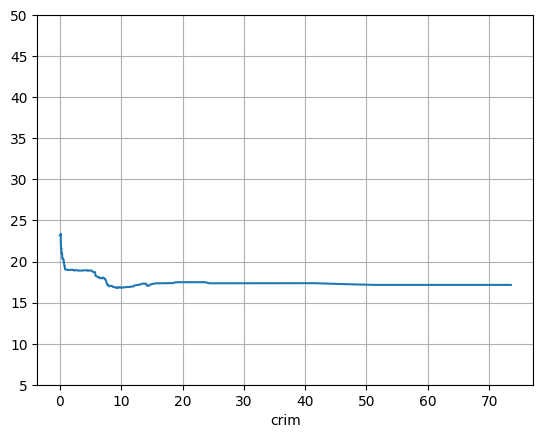

In [11]:
# ③ 이를 그래프로 그립니다. x축 : crim, y축 : 예측값
sns.lineplot(x = crim_values, y = pred_crim)
plt.ylim(y_train.min(), y_train.max())  # 실제 값의 범위 지정
plt.grid()
plt.show()

In [12]:
y_train.describe()

count    404.000000
mean      22.763614
std        9.456729
min        5.000000
25%       16.700000
50%       21.400000
75%       26.525000
max       50.000000
Name: medv, dtype: float64

* 다른 변수의 영향력도 살펴봅시다.
    * lstat
    * ptratio
    * rm

* 반복되는 코드이므로 함수로 생성해 봅시다.

In [13]:
def ice_plot(model, x, y, data_1row, var) :

    # ① x_train에서 crim의 값들을 뽑습니다.
    x_values = x[var].sort_values()

    # ② data1의 crim 에 ①의 값을 하나씩 넣으며 예측값을 계산합니다.
    pred = []

    for v in x_values :
        data_1row[var] = v
        pred.append(model.predict(data_1row)[0])

    # ③ 이를 그래프로 그립니다. x축 : crim, y축 : 예측값
    sns.lineplot(x = x_values, y = pred)
    plt.ylim(y.min(), y.max())  # 실제 값의 범위 지정
    plt.grid()
    plt.show()

In [14]:
data1.shape, x_train.shape

((1, 12), (404, 12))

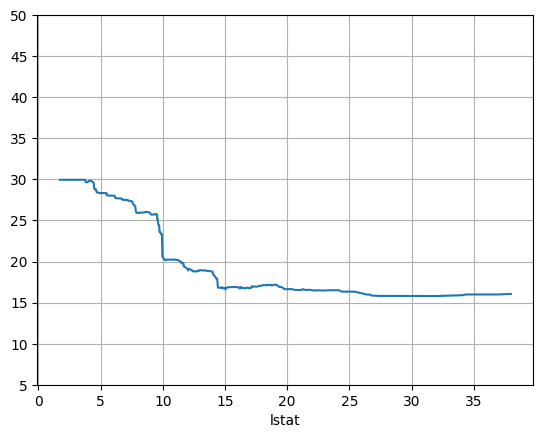

In [15]:
ice_plot(model, x_train, y_train, data1, 'lstat')

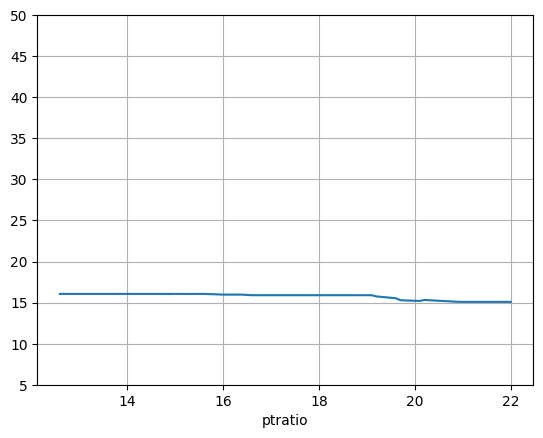

In [16]:
ice_plot(model, x_train, y_train, data1, 'ptratio')

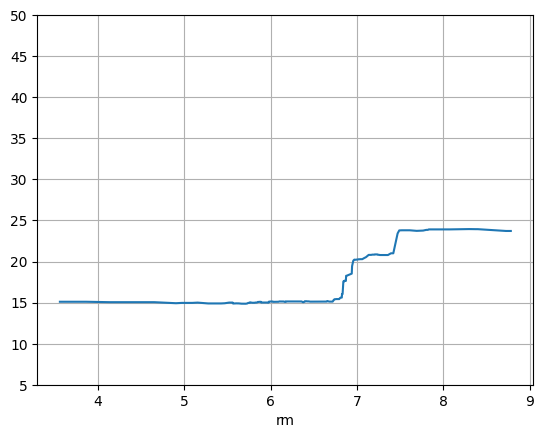

In [17]:
ice_plot(model, x_train, y_train, data1, 'rm')

### 2) 여러행에서, 특정 변수의 영향력 살펴보기

* ① x_train에서 20개의 행을 랜덤으로 뽑습니다.
* ② 20개 행에 대해서 lstat의 영향력을 그래프로 그립니다.(ice plot)
* ③ 이들의 평균선을 추가합니다.(PDP!)

In [18]:
# ① x_train에서 20개의 행을 랜덤으로 뽑습니다.
data20 = x_train.sample(20, random_state = 2023)
data20

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
38,0.17505,0.0,5.96,0,0.4990,5.966,30.2,3.8473,5,279,19.2,10.13
203,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,3.81
471,4.03841,0.0,18.10,0,0.5320,6.229,90.7,3.0993,24,666,20.2,12.87
383,7.99248,0.0,18.10,0,0.7000,5.520,100.0,1.5331,24,666,20.2,24.56
290,0.03502,80.0,4.95,0,0.4110,6.861,27.9,5.1167,4,245,19.2,3.33
206,0.22969,0.0,10.59,0,0.4890,6.326,52.5,4.3549,4,277,18.6,10.97
379,17.86670,0.0,18.10,0,0.6710,6.223,100.0,1.3861,24,666,20.2,21.78
57,0.01432,100.0,1.32,0,0.4110,6.816,40.5,8.3248,5,256,15.1,3.95
441,9.72418,0.0,18.10,0,0.7400,6.406,97.2,2.0651,24,666,20.2,19.52
18,0.80271,0.0,8.14,0,0.5380,5.456,36.6,3.7965,4,307,21.0,11.69


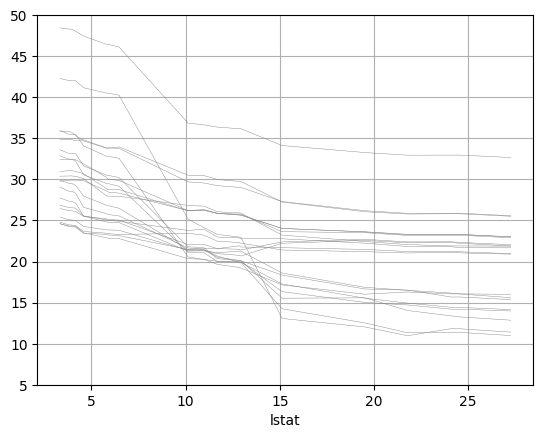

In [19]:
# ② 20개 행에 대해서 lstat의 영향력을 그래프로 그립니다.(ice plot)

var = 'lstat'

for i in range(20) :

    # 특정 변수의 값을 뽑아 정렬
    x_values = data20[var].sort_values()

    # 행 하나씩 추출
    data1 = data20.iloc[[i]]

    # 추출된 한 행에서, 특정 변수의 값을 하나씩 대입하고 예측
    pred = []
    for v in x_values :
        data1[var] = v
        pred.append(model.predict(data1)[0])

    # 한 행에 대한 라인플롯, x축 : 특정 변수의 값, y축 : 예측값.
    sns.lineplot(x = x_values, y = pred, color = 'gray', linewidth = 0.3)
    plt.ylim(y_train.min(), y_train.max())  # 실제 값의 범위 지정

plt.grid()
plt.show()

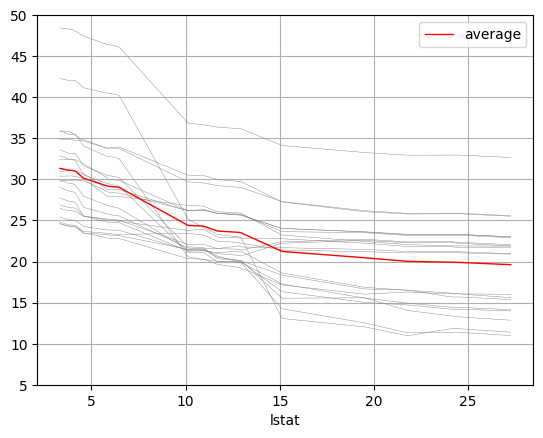

In [20]:
# ③ 이들의 평균선을 추가합니다.(PDP!)

# 개별 라인차트들 -----------------------------------------------------
var = 'lstat'
pred_values = []
for i in range(20) :

    x_values = data20[var].sort_values()
    data1 = data20.iloc[[i]]
    pred = []

    for v in x_values :
        data1[var] = v
        pred.append(model.predict(data1)[0])

    pred_values.append(pred)

    sns.lineplot(x = x_values, y = pred, color = 'gray', linewidth = 0.3)
    plt.ylim(y_train.min(), y_train.max())  # 실제 값의 범위 지정

# -----------------------------------------------------------------------
# 평균선 추가 -----------------------------------------------------------
pred_mean = np.array(pred_values).mean(axis = 0)
sns.lineplot(x = x_values, y = pred_mean, color = 'red', linewidth = 1, label = 'average')

plt.grid()
plt.show()

## 5.함수 이용하기

In [21]:
from sklearn.inspection import PartialDependenceDisplay, partial_dependence

### 1) PDP 그리기
* model : 이미 만든 모델
* features : 분석할 대상 feature
* X : 데이터셋(x)
* kind : 'both' ➡ plotting both Partial dependence (PD) and individual conditional expectation (ICE)

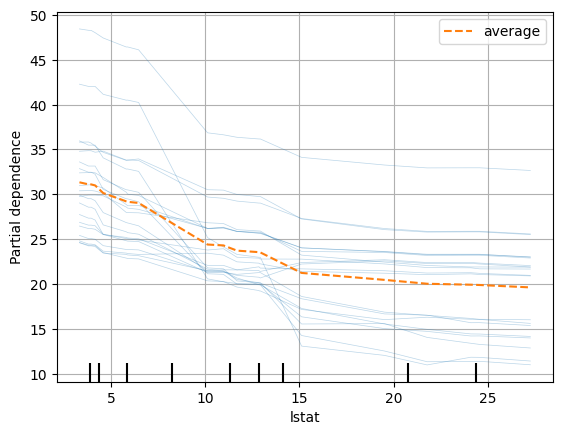

In [22]:
var = 'lstat'
PartialDependenceDisplay.from_estimator(model, data20, [var], kind="both")
plt.grid()
plt.show()

In [23]:
var = 'rm'
temp = x_train.head(3).copy()

pdp = partial_dependence(model, features = [var], X = temp, kind = 'both')
print(pdp['average'])
print(pdp['individual'])
print(pdp['values'])

[[25.036      27.40666667 37.999     ]]
[[[23.336 23.291 31.346]
  [27.047 30.984 43.212]
  [24.725 27.945 39.439]]]
[array([6.172, 6.727, 7.47 ])]


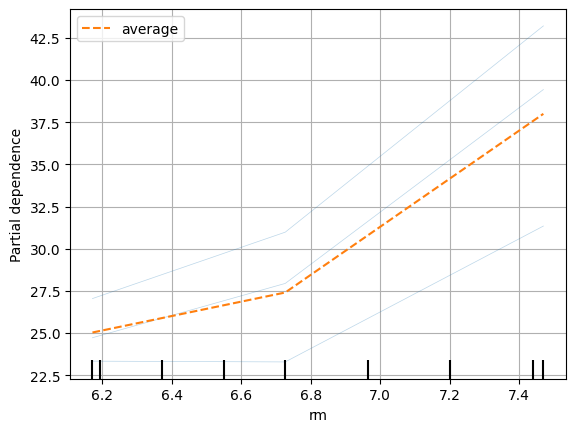

In [24]:
PartialDependenceDisplay.from_estimator(model, temp, [var], kind="both")
plt.grid()
plt.show()

In [25]:
temp

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15
268,0.54050,20.0,3.97,0,0.575,7.470,52.6,2.8720,5,264,13.0,3.16
80,0.04113,25.0,4.86,0,0.426,6.727,33.5,5.4007,4,281,19.0,5.29


* 수동으로 만들기


In [ ]:
temp['rm'] = 6.172
temp
model.predict(temp)

* 전체 데이터에 대해서 살펴봅시다.

In [ ]:
PartialDependenceDisplay.from_estimator(model,
                                        x_train,
                                        ['rm'],
                                        kind="both")
plt.grid()
plt.show()

### 2) 두 변수의 영향력 비교
* 변수 입력 : 리스트로

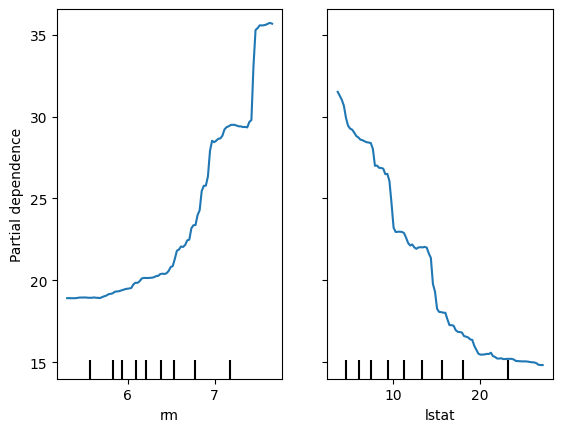

In [26]:
PartialDependenceDisplay.from_estimator(model, x_train, ['rm','lstat'])
plt.show()

### 3) 두 변수의 조합으로 분석
* 리스트 안에 튜플로 입력

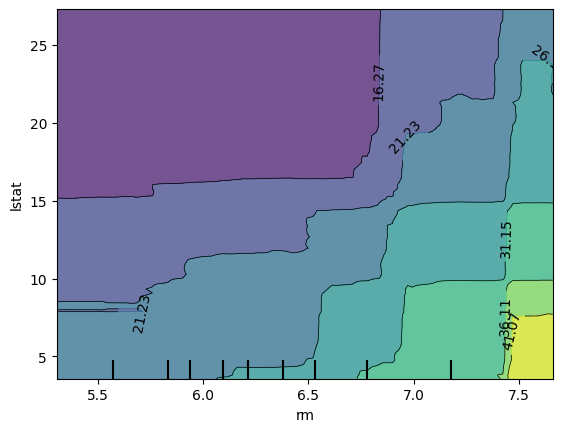

In [27]:
PartialDependenceDisplay.from_estimator(model, x_train, [('rm','lstat')])
plt.show()

## 6.실습 : 특정 feature 값의 변화에 따른 예측값 영향 분석

### 1) 데이터 준비

* 데이터 로딩

In [28]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition2.csv"
data = pd.read_csv(path)
data.head(10)

,Attrition,Age,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,0,28,Research & Development,1,3,Medical,Female,Research Scientist,1,Married,3591,1,3,3,3,3,3
1,1,37,Research & Development,2,2,Other,Male,Laboratory Technician,3,Single,2090,6,2,7,3,3,0
2,0,27,Research & Development,8,5,Life Sciences,Male,Laboratory Technician,3,Married,4621,1,4,3,4,3,3
3,0,18,Research & Development,1,3,Life Sciences,Female,Laboratory Technician,4,Single,1611,1,3,0,5,4,0
4,0,29,Research & Development,9,3,Life Sciences,Male,Research Scientist,3,Married,2451,6,1,5,2,2,1
5,0,44,Research & Development,2,1,Medical,Male,Manufacturing Director,3,Single,10209,5,2,16,2,2,2
6,0,41,Sales,10,2,Life Sciences,Male,Sales Executive,4,Single,6230,7,4,16,3,3,14
7,0,25,Sales,18,1,Life Sciences,Male,Sales Executive,3,Married,6232,2,2,6,3,2,3
8,0,50,Research & Development,2,3,Medical,Male,Research Director,3,Married,17639,5,4,30,3,3,4
9,0,47,Sales,4,2,Life Sciences,Female,Sales Executive,4,Single,4163,1,3,9,0,3,9


|	변수 명	|	내용	|	구분	|
|	----	|	----	|	----	|
|	**Attrition**	|	이직여부, Yes = 1 , No = 0	|	**Target**	|
|	Age	|	나이	|	숫자	|
|	BusinessTravel	|	출장 빈도(범주)	|		|
|	Department	|	현 부서	|		|
|	DistanceFromHome	|	집-직장 거리(마일)	|	숫자	|
|	Education	|	교육수준(범주)	|	1 Below College, 2 College, 3 Bachelor, 4 Master, 5 Doctor	|
|	EducationField	|	전공	|		|
|	EnvironmentSatisfaction	|	근무환경에 대한 만족도(범주)	|	1 Low, 2 Good, 3 Excellent, 4 Outstanding	|
|	Gender	|	성별	|		|
|	JobInvolvement	|	직무 적극성(참여도)	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	JobRole	|	직무	|		|
|	JobSatisfaction	|	직무 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	MaritalStatus	|	결혼상태	|		|
|	MonthlyIncome	|	월급	|	숫자	|
|	NumCompaniesWorked	|	현재까지 근무한 회사 수	|	숫자	|
|	PercentSalaryHike	|	전년대비 급여인상율(%)	|	숫자	|
|	RelationshipSatisfaction	|	동료와의 관계 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	StockOptionLevel	|	스톡옵션 수준 0~3	|	범주	|
|	TotalWorkingYears	|	총 근무 연수	|	숫자	|
|	TrainingTimesLastYear	|	전년 교육훈련 횟수	|	숫자	|
|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	1 Bad, 2 Good, 3 Better, 4 Best	|
|	YearsAtCompany	|	현직장 근무 연수	|	숫자	|
|	YearsInCurrentRole	|	현직무 연수	|	숫자	|
|	YearsWithCurrManager	|	현 팀장과 근무한 연수	|	숫자	|


In [29]:
target = 'Attrition'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [30]:
y.value_counts(normalize = True)

0    0.913043
1    0.086957
Name: Attrition, dtype: float64

* 가변수화 Dummy Variable

In [31]:
dummy_vars = ['Education','Department','EducationField','Gender','JobRole','MaritalStatus']
x = pd.get_dummies(x, columns = dummy_vars, drop_first=True)

* 데이터 분할
    * 이미 test set은 분할되어 있다고 가정합니다.
    * 주어진 데이터를 train set : validation set 으로 분할

In [32]:
# train_val에서 train : val = 8 : 2
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 20)

In [33]:
print(x_train.shape, x_val.shape)

(920, 32) (230, 32)


* class balance를 맞추기 위한 resampling

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

### 2) 모델링

* model : RandomForest, xgb, svm 등...

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

### 3) PDP

* model : 이미 만든 모델
* features : 아래 변수들에 대해 분석을 시도하시오.
* X : x_val
* kind
    * kind='average' results in the traditional PD plot(default)
    * kind='individual' results in the ICE plot
    * kind='both' results in plotting both the ICE and PD on the same plot.

In [38]:
from sklearn.inspection import PartialDependenceDisplay, partial_dependence

#### ① 개별 변수 분석

* 중요한 feature 각각에 대해서 PDP를 그리고 해석해 보겠습니다.
    * kind 옵션 없이 그래프 그리기
    * kind = 'both'로 그래프 그리기

* feature 1 : 'MonthlyIncome'

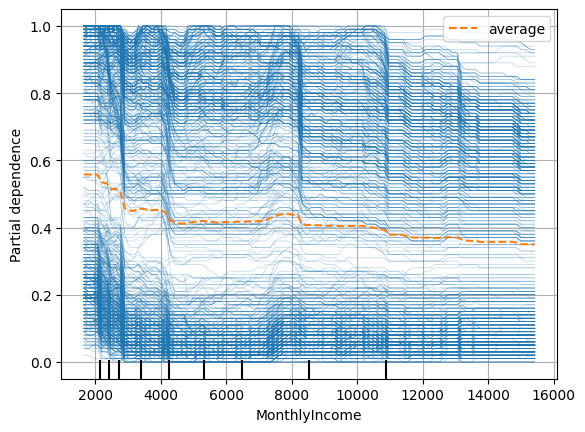

In [42]:
var = 'MonthlyIncome'
PartialDependenceDisplay.from_estimator(model, x_train, [var], kind="both")
plt.grid()
plt.show()

* feature 2 : 'MaritalStatus_Married'

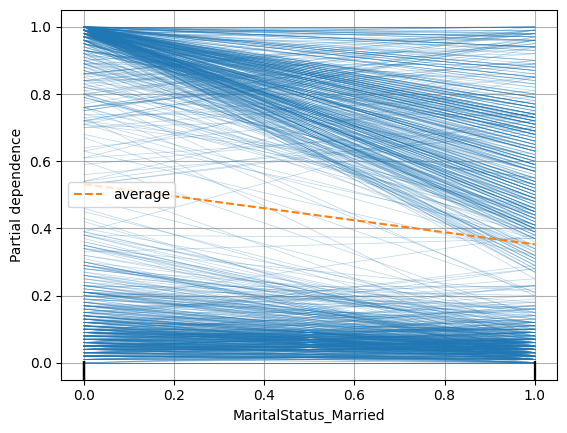

In [43]:
var = 'MaritalStatus_Married'
PartialDependenceDisplay.from_estimator(model, x_train, [var], kind="both")
plt.grid()
plt.show()

* feature 3 : 'DistanceFromHome'

* feature 4 : 'JobSatisfaction'

#### ② 두 변수와 예측값 비교
* 두 변수의 영향력 비교
* 두 변수의 조합으로 분석


* 조합1 : 'MonthlyIncome','MaritalStatus_Married'

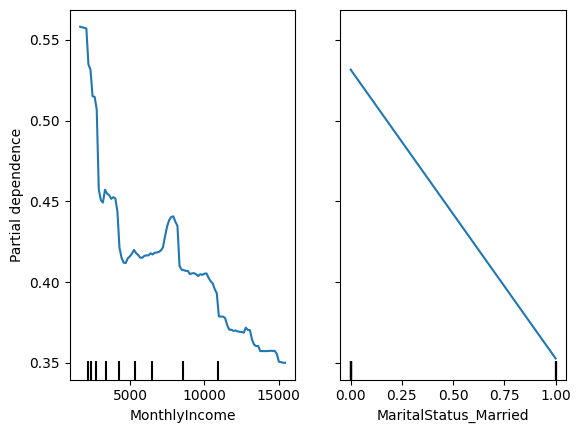

In [44]:
PartialDependenceDisplay.from_estimator(model, x_train, ['MonthlyIncome','MaritalStatus_Married'])
plt.show()

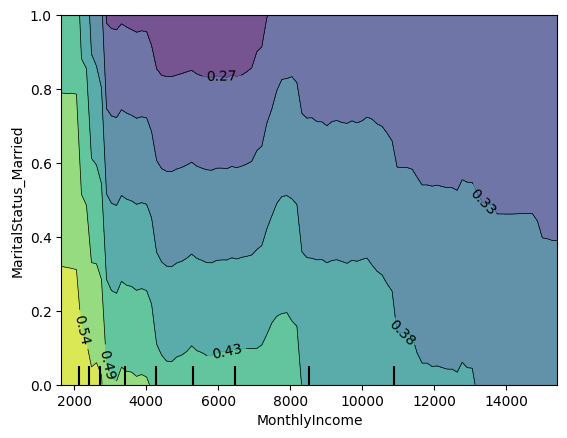

In [45]:
PartialDependenceDisplay.from_estimator(model, x_train, [('MonthlyIncome','MaritalStatus_Married')])
plt.show()

* 조합2 : 'DistanceFromHome','JobSatisfaction'